In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [14]:
df = pd.read_csv('mission/hotel_data_modified.csv')

In [15]:
null_df = pd.DataFrame({'개수': df.isnull().sum(), '비율(%)': df.isnull().mean() * 100})
null_df.query('개수 > 0').sort_values('개수', ascending=False)

,개수,비율(%)
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


In [16]:
df['company'].value_counts().head(15)

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
174.0    149
219.0    141
281.0    138
154.0    133
405.0    119
233.0    114
51.0      99
94.0      87
47.0      72
135.0     66
Name: count, dtype: int64

In [ ]:
# 1. 자녀 수(Children) 빈칸 있는 행 삭제
df.dropna(subset=['children'], inplace=True)

# 2. 회사(Company), 에이전트(Agent) 빈칸은 0으로 채우기
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

# 3. 국적(Country) 빈칸은 'Unknown'로 채우기
df['country'] = df['country'].fillna('Unknown')

# 확인 사살
print("남은 결측치 개수:", df.isnull().sum().sum())
print("Unknown 수:", (df['country']=='Unknown').sum())

남은 결측치 개수: 0
Unknown 수: 488


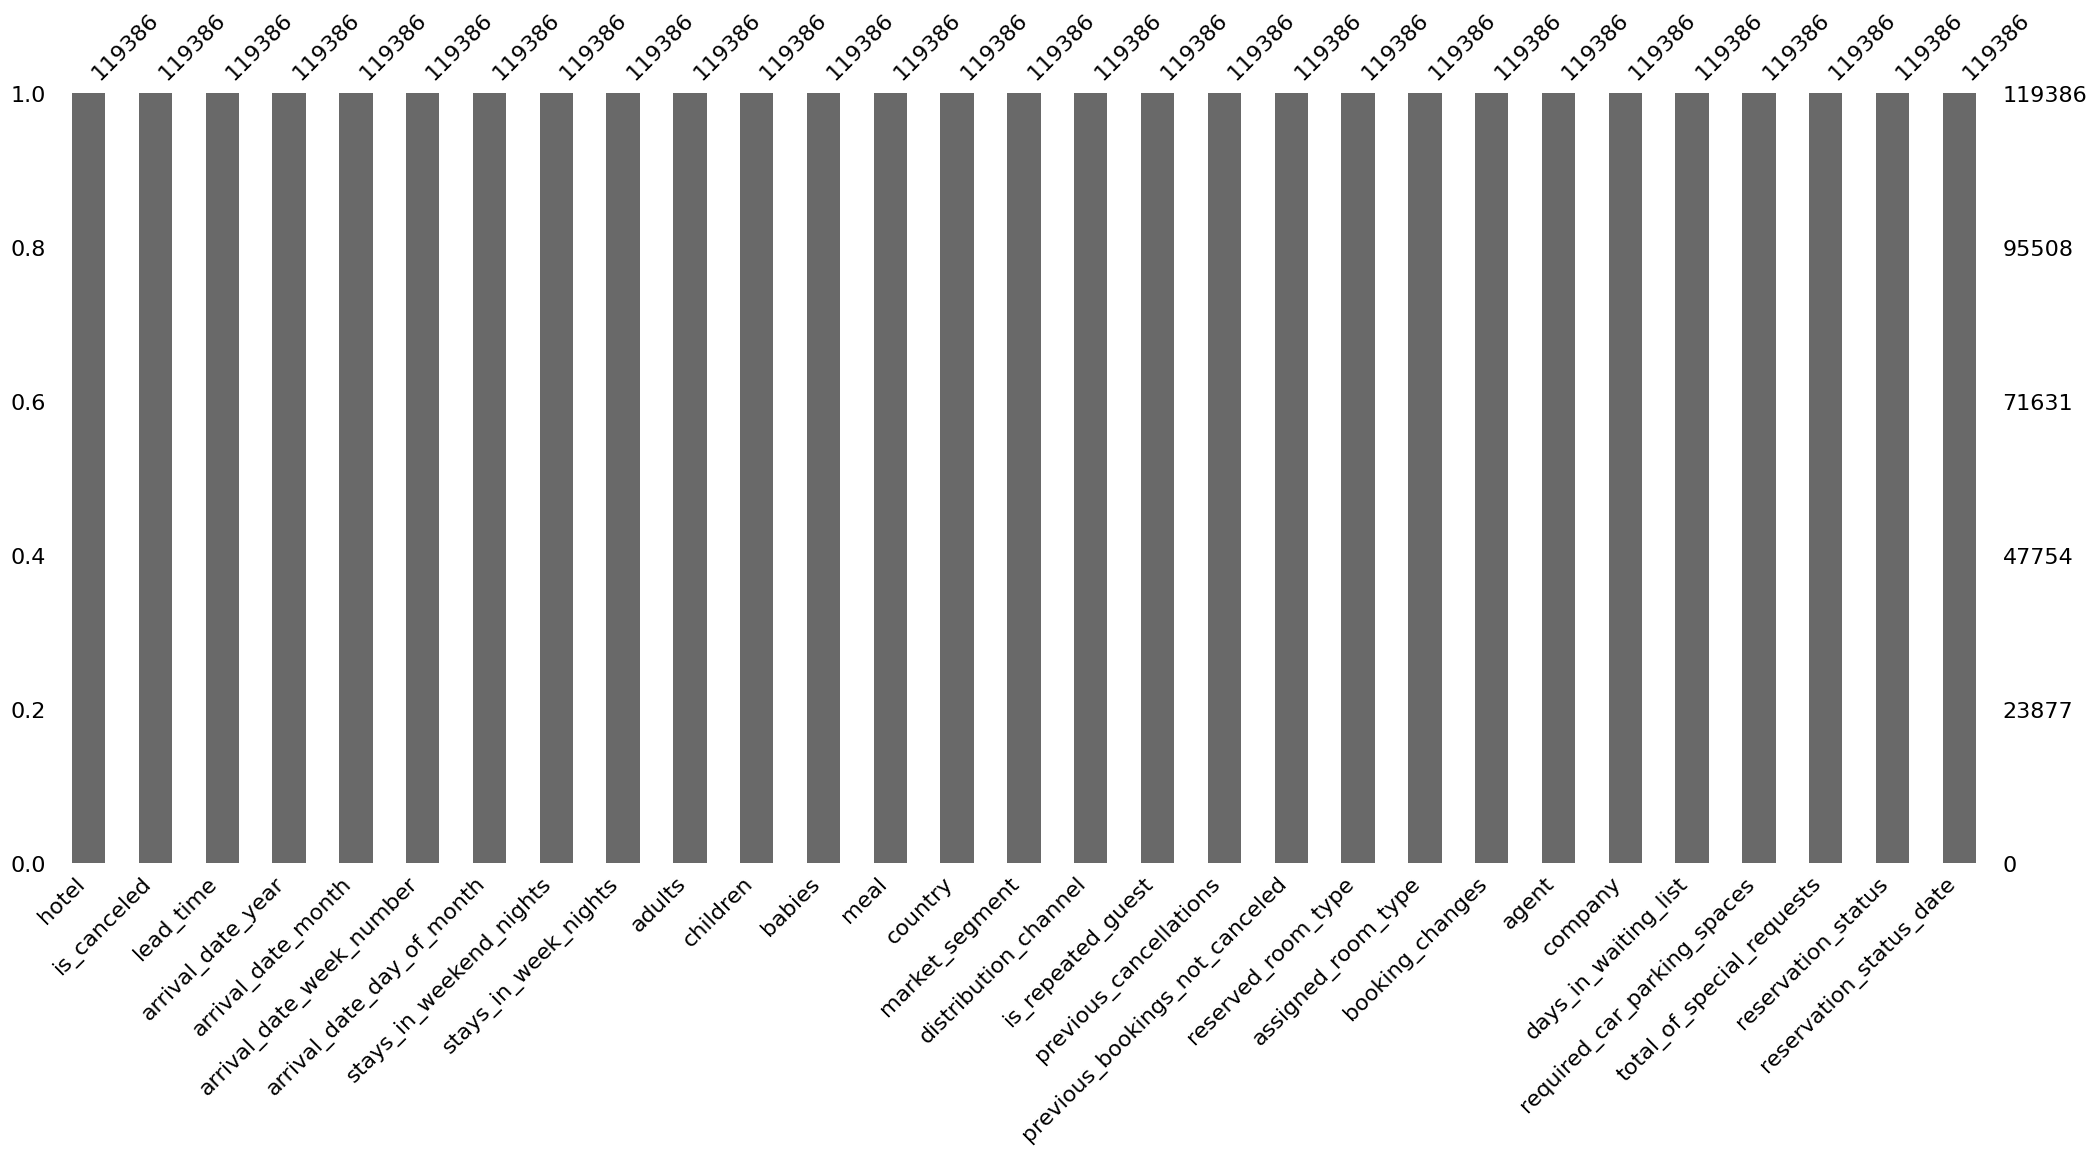

In [25]:
msno.bar(df)
plt.show()

데이터에 결측치의 비중이 높은 것을 확인 후 삭제

In [29]:
# 하나만 삭제할 때
df = df.drop(['company', 'reservation_status'], axis=1)

In [15]:
# 분석할 타겟 문자열 컬럼만 선정
target_cols = ['arrival_date_month', 'meal', 'market_segment',
               'distribution_channel', 'reserved_room_type', 'assigned_room_type']

# 숫자로 변신! (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=target_cols)

# 상관관계 확인
top_targets = df_encoded.corr(numeric_only=True)['is_canceled'].sort_values(ascending=False)
print(top_targets.head(6))

is_canceled                   1.000000
lead_time                     0.293123
market_segment_Groups         0.221859
assigned_room_type_A          0.197187
distribution_channel_TA/TO    0.175944
previous_cancellations        0.110133
Name: is_canceled, dtype: float64


In [18]:
# 분석할 타겟 문자열 컬럼만 선정
target_cols = ['arrival_date_month', 'meal', 'market_segment',
               'distribution_channel', 'reserved_room_type', 'assigned_room_type']

# 숫자로 변신! (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=target_cols)

# 상관관계 확인
top_targets = df_encoded.corr(numeric_only=True)['is_canceled'].sort_values(ascending=True)
print(top_targets.head(6))

total_of_special_requests     -0.234658
required_car_parking_spaces   -0.195498
market_segment_Direct         -0.154390
distribution_channel_Direct   -0.151620
booking_changes               -0.144381
assigned_room_type_D          -0.128036
Name: is_canceled, dtype: float64


In [32]:
city_rate = cancel_rates['City Hotel']
resort_rate = cancel_rates['Resort Hotel']

print(f" City Hotel 취소율: {city_rate:.2f}%")
print(f" Resort Hotel 취소율: {resort_rate:.2f}%")

 City Hotel 취소율: 41.73%
 Resort Hotel 취소율: 27.76%
